# Medical Cost Prediction



## Data Load

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.simplefilter(action='ignore', category=FutureWarning)

In [2]:
df= pd.read_csv("data/insurance.csv")

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [4]:
df.isna().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [5]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [115]:
df.describe(include=["object"])

,sex,smoker,region
count,1338,1338,1338
unique,2,2,4
top,male,no,southeast
freq,676,1064,364


In [6]:
df["region"].unique()

array(['southwest', 'southeast', 'northwest', 'northeast'], dtype=object)



## Data Visualization

### 1. Age and the distribution of charges

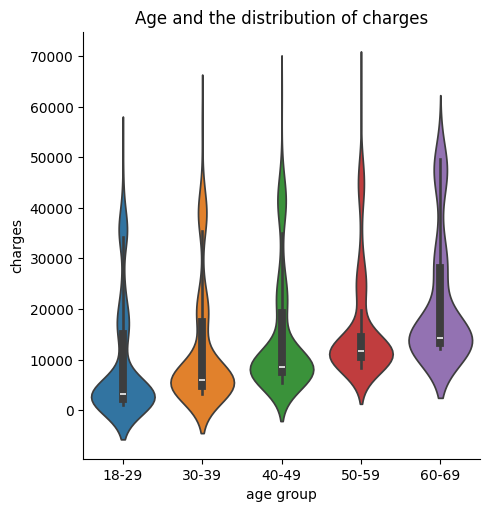

In [117]:
data=df.copy(deep=True)
bins = [18, 30, 40, 50, 60, 70]
labels = ['18-29', '30-39', '40-49', '50-59', '60-69']
data['age group']= pd.cut(data['age'], bins=bins, labels=labels, right=False)


sns.catplot(x='age group', y='charges', hue='age group', data=data, kind='violin')
plt.title('Age and the distribution of charges');

### 2. Sex and the distribution of charges

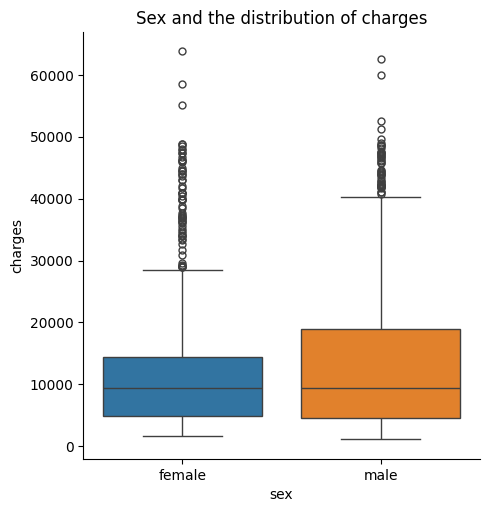

In [118]:
sns.catplot(x='sex', y='charges', data=data, hue='sex', kind='box')
plt.title('Sex and the distribution of charges');

### 3. Number of children and the distribution of charges

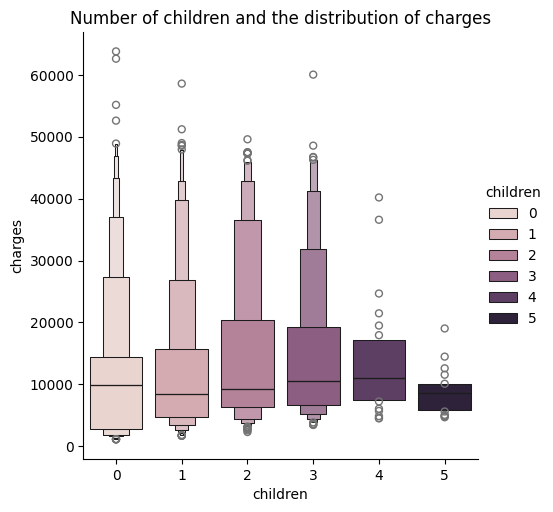

In [119]:
sns.catplot(x='children', y='charges', data=data, hue='children', kind='boxen')
plt.title('Number of children and the distribution of charges');

### 4. Region and the distribution of charges

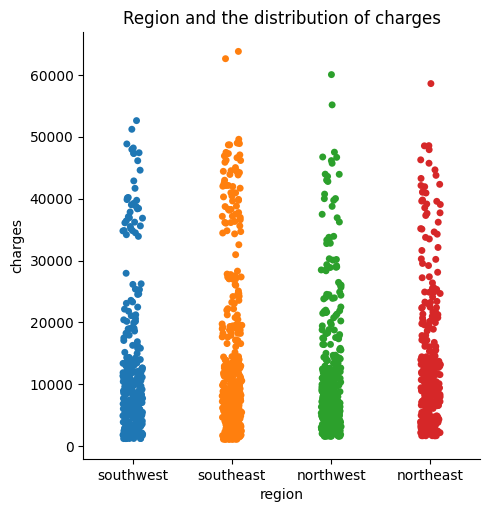

In [120]:
sns.catplot(x='region', y='charges', data=data, hue='region')
plt.title('Region and the distribution of charges');

### 5.Smoking and the distribution of charges

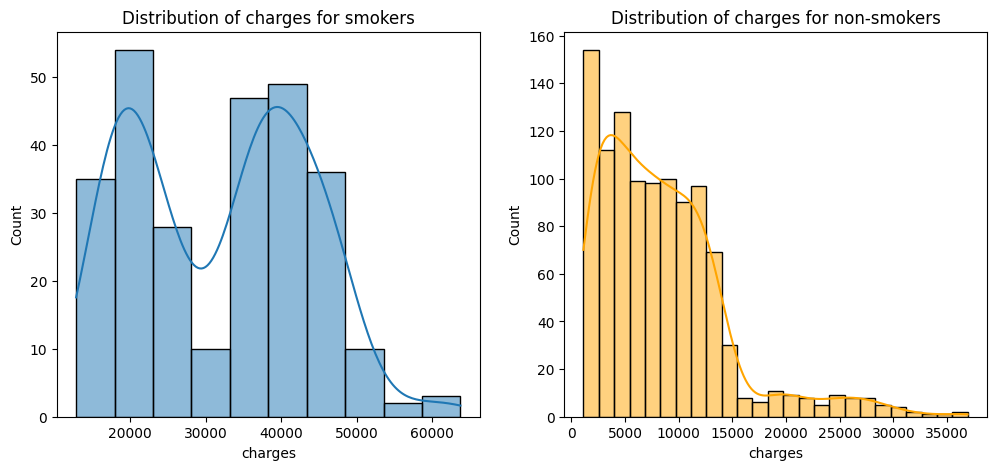

In [121]:
f= plt.figure(figsize=(12,5))

ax=f.add_subplot(121)
sns.histplot(data[(data.smoker == 'yes')]["charges"],ax=ax, kde='True')
ax.set_title('Distribution of charges for smokers')

ax=f.add_subplot(122)
sns.histplot(data[(data.smoker == 'no')]['charges'],ax=ax, color= 'orange', kde='True')
ax.set_title('Distribution of charges for non-smokers');

### 6. BMI and the distribution of charges

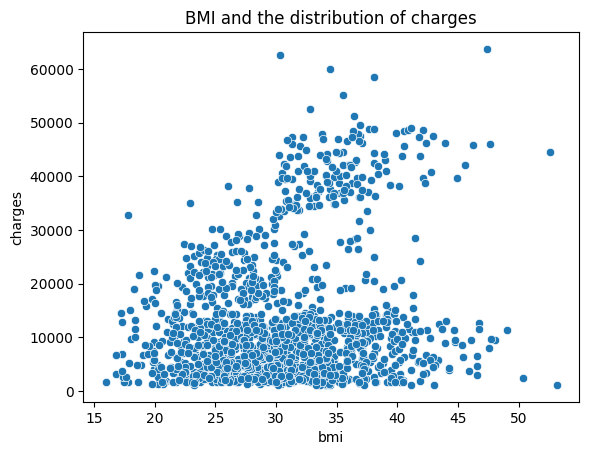

In [122]:
sns.scatterplot(data=data, x='bmi', y='charges')
plt.title('BMI and the distribution of charges');

### 7.  Global view of the data

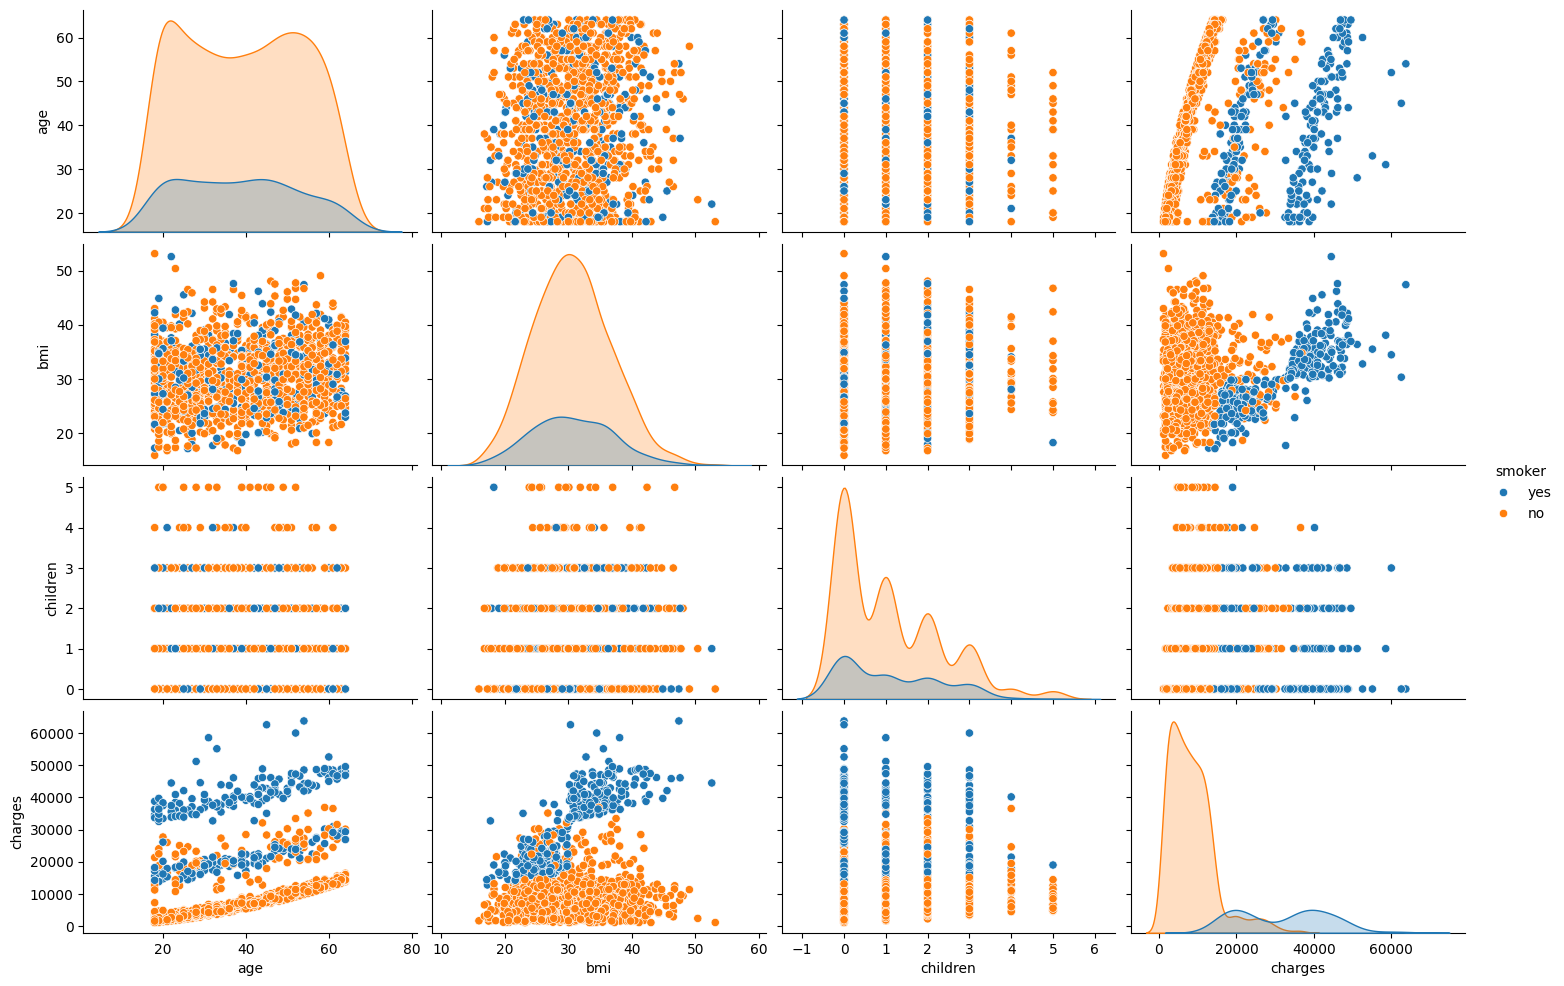

In [123]:
sns.pairplot(data, hue='smoker', height=2.5, aspect=1.5);

## Model building for medical cost prediction

### 1. Splitting and Scaling train and test data sets

In [7]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

df.replace({'yes': 1, 'no': 0, 'female': 0, 'male': 1},  inplace=True)

X= df.iloc[:, :-2]
y=df['charges']

X_train,X_test,y_train,y_test=train_test_split(X, y,random_state=100)

### 2. Linear Regression model

In [8]:
from sklearn.linear_model import LinearRegression


linreg = LinearRegression().fit(X_train, y_train)

y_pred_train=linreg.predict(X_train)
y_pred_test=linreg.predict(X_test)

print('linear model coeff (w): {}'
     .format(linreg.coef_))
print('linear model intercept (b): {:.3f}'
     .format(linreg.intercept_))
print('R-squared score (training): {:.3f}'
     .format(linreg.score(X_train, y_train)))
print('R-squared score (test): {:.3f}'
     .format(linreg.score(X_test, y_test)))
print('Mean squared error (training): {:.3f}'
     .format(mean_squared_error(y_pred_train, y_train)))
print('Mean squared error (test): {:.3f}'
     .format(mean_squared_error(y_pred_test, y_test)))

linear model coeff (w): [  261.88331209    29.0279145    294.27140164   460.37032198
 23714.29405194]
linear model intercept (b): -11355.987
R-squared score (training): 0.739
R-squared score (test): 0.781
Mean squared error (training): 38201043.276
Mean squared error (test): 32266042.245


### 3. Polynomial regression

In [9]:
from sklearn.preprocessing import PolynomialFeatures

poly=PolynomialFeatures(degree=2)
X_train_poly=poly.fit_transform(X_train)
X_test_poly=poly.transform(X_test)

linreg=LinearRegression().fit(X_train_poly, y_train)
y_pred_train=linreg.predict(X_train_poly)
y_pred_test=linreg.predict(X_test_poly)

print('Polynomial model coeff (w): {}'
     .format(linreg.coef_))
print('Polynomial model intercept (b): {:.3f}'
     .format(linreg.intercept_))
print('R-squared score (training): {:.3f}'
     .format(linreg.score(X_train_poly, y_train)))
print('R-squared score (test): {:.3f}'
     .format(linreg.score(X_test_poly, y_test)))
print('Mean squared error (training): {:.3f}'
     .format(mean_squared_error(y_pred_train, y_train)))
print('Mean squared error (test): {:.3f}'
     .format(mean_squared_error(y_pred_test, y_test)))

Polynomial model coeff (w): [ 0.00000000e+00 -1.13600860e+02  5.00507954e+01  4.11878705e+02
  1.00584732e+03 -1.03252089e+04  4.15183249e+00 -5.89804431e-01
  1.70769849e+00  2.13824380e+00  3.20479240e+00  5.00507954e+01
 -1.23946644e+01 -2.53192624e+02  3.67263442e+02 -7.70625958e+00
  2.86347464e+00  1.45292369e+03 -9.66317220e+01 -4.84054490e+02
 -1.03252089e+04]
Polynomial model intercept (b): -2204.588
R-squared score (training): 0.836
R-squared score (test): 0.866
Mean squared error (training): 24008293.835
Mean squared error (test): 19736975.513


### 4. Lasso regression

In [43]:
from sklearn.linear_model import Lasso
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PolynomialFeatures

poly=PolynomialFeatures(degree=2)
X_train_poly=poly.fit_transform(X_train)
X_test_poly=poly.transform(X_test)
scaler=StandardScaler()
X_train_scaled=scaler.fit_transform(X_train_poly)
X_test_scaled=scaler.transform(X_test_poly)

linlasso = Lasso(alpha=2, max_iter=5000).fit(X_train_scaled, y_train)
y_pred_train=linlasso.predict(X_train_scaled)
y_pred_test=linlasso.predict(X_test_scaled)

print('Lasso model coeff (w): {}'
     .format(linlasso.coef_))
print('Lasso model intercept (b): {:.3f}'
     .format(linlasso.intercept_))
print('R-squared score (training): {:.3f}'
     .format(linlasso.score(X_train_scaled, y_train)))
print('R-squared score (test): {:.3f}'
     .format(linlasso.score(X_test_scaled, y_test)))
print('Mean squared error (training): {:.3f}'
     .format(mean_squared_error(y_pred_train, y_train)))
print('Mean squared error (test): {:.3f}'
     .format(mean_squared_error(y_pred_test, y_test)))

Lasso model coeff (w): [ 0.00000000e+00 -1.31196579e+03  0.00000000e+00  2.35741823e+03
  1.12453691e+03 -6.91842420e-03  4.46176986e+03 -0.00000000e+00
  7.99762311e+02  1.16285113e+02  2.00681241e+01  0.00000000e+00
 -1.60084025e+02 -2.51689839e+02  1.11467787e+02 -2.79521558e+03
  1.20580322e+02  1.81421316e+04 -3.62321542e+02 -3.18557606e+02
 -8.08933501e+03]
Lasso model intercept (b): 13071.159
R-squared score (training): 0.836
R-squared score (test): 0.866
Mean squared error (training): 24011208.414
Mean squared error (test): 19732354.448


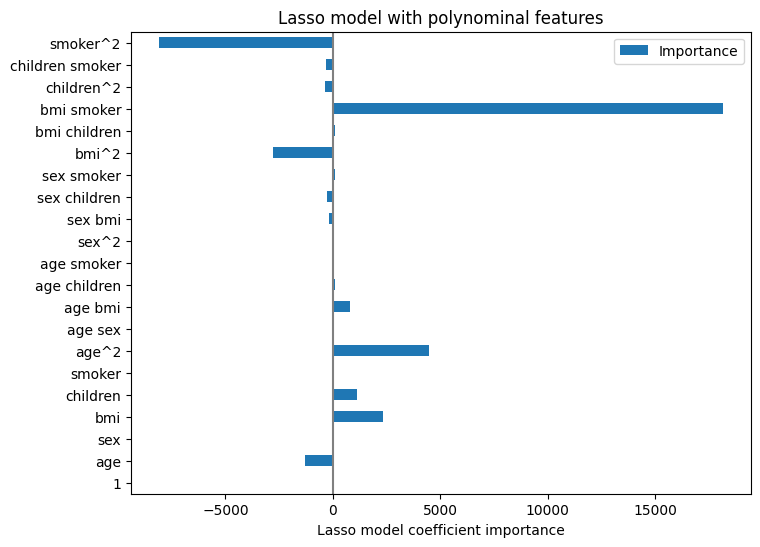

In [44]:
feature_names=poly.get_feature_names_out()
feature_importance=linlasso.coef_

feature_importance=dict(zip(feature_names, feature_importance))

dx=pd.DataFrame([feature_importance])
dx = dx.T
dx.columns = ['Importance']

dx.plot(kind='barh', figsize=(8, 6))
plt.axvline(x=0, color='.5')
plt.title('Lasso model with polynominal features')
plt.xlabel('Lasso model coefficient importance');

### 5. Random forest model

In [147]:
from sklearn.ensemble import RandomForestRegressor
forest = RandomForestRegressor(n_estimators = 70,
                              criterion = 'squared_error',
                              random_state = 0,
                              n_jobs = -1)
forest.fit(X_train,y_train)
y_pred_train = forest.predict(X_train)
y_pred_test = forest.predict(X_test)

print('R-squared score (training): {:.3f}'
     .format(forest.score(X_train, y_train)))
print('R-squared score (test): {:.3f}'
     .format(forest.score(X_test, y_test)))
print('Mean squared error (training): {:.3f}'
     .format(mean_squared_error(y_pred_train, y_train)))
print('Mean squared error (test): {:.3f}'
     .format(mean_squared_error(y_pred_test, y_test)))

R-squared score (training): 0.972
R-squared score (test): 0.861
Mean squared error (training): 4043438.889
Mean squared error (test): 20461433.337


## Conclusion:
It seems like the Random forest model is a bit overfit and the linear regression model is underfit. The Lasso regression model with polymonial features gives us the best result, and we will choose this model and plot the result.

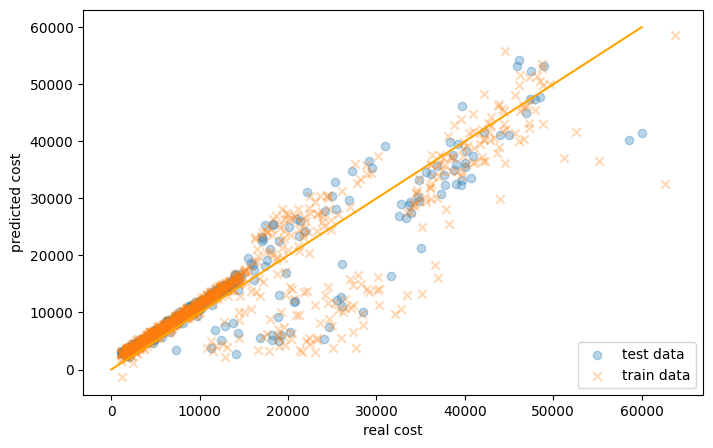

In [34]:
y_pred_train=linlasso.predict(X_train_scaled)
y_pred_test=linlasso.predict(X_test_scaled)

plt.figure(figsize=(8,5))
plt.scatter(y_test,y_pred_test, alpha=0.3, label='test data')
plt.scatter(y_train, y_pred_train, alpha=0.3, marker='x', label='train data')
plt.plot(range(0, 60000), range(0, 60000), c='orange')
plt.ylabel('predicted cost')
plt.xlabel('real cost')
plt.legend(loc='lower right');

In [45]:
import pickle
from sklearn.pipeline import Pipeline

lasso_pipeline = Pipeline([
    ('poly', PolynomialFeatures(degree=2)),
    ('scaler', StandardScaler()),
    ('lasso', Lasso(alpha=2, max_iter=5000))
])
lasso_pipeline.fit(X_train, y_train)

with open('lasso_model_pipeline.pkl', 'wb') as file:
    pickle.dump(lasso_pipeline, file)